In [0]:
from keras.layers import *
from keras.models import load_model
from keras import backend as K
import time
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [2]:
!git clone https://github.com/qubvel/classification_models.git

Cloning into 'classification_models'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 376 (delta 0), reused 0 (delta 0), pack-reused 372
Receiving objects: 100% (376/376), 4.08 MiB | 19.43 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [3]:
!ls

classification_models  sample_data


In [4]:
!pip install image-classifiers

     |████████████████████████████████| 81kB 3.7MB/s 


In [5]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-xxruy1w0
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-xxruy1w0
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-0mzqifl4/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [9]:
!ls classification_models/

classification_models  LICENSE	    __pycache__  requirements.txt  tests
__init__.py	       MANIFEST.in  README.md	 setup.py


In [0]:
from classification_models.classification_models.resnet import ResNet18, preprocess_input

# resnet18 = ResNet18((32, 32, 3), weights='imagenet',include_top=False)

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [12]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# del model

In [15]:
image_input = Input(shape=(32, 32, 3))

model = ResNet18((32,32,3),input_tensor=image_input, include_top=False,weights='imagenet')


W0702 06:26:51.898566 139866471327616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 06:26:51.922640 139866471327616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 06:26:51.923629 139866471327616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0702 06:26:51.924420 139866471327616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0702 06:26:54.486079 139866471327616 deprecatio

44924928/44920640 [==============================] - 1s 0us/step


In [0]:
from keras.models import *

In [16]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [29]:
# x= Flatten(name='flatten')(model.output)
# out = Dense(10, activation='softmax', name='output_layer')(x)
# resnet18_model = Model(inputs=image_input,outputs= out)
# resnet18_model.summary()

x=Convolution2D(10,1,1,activation='softmax')(model.output)
out=Flatten(name='flatten')(x)
resnet18_model = Model(inputs=image_input,outputs= out)
resnet18_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="softmax")`
  


In [0]:
resnet18_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
!git clone https://github.com/yu4u/cutout-random-erasing.git

Cloning into 'cutout-random-erasing'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), done.


In [0]:
!mv cutout-random-erasing/*  ./

## Adding Cut out for Data Augmentation

In [0]:
from random_eraser import get_random_eraser


from keras.preprocessing.image import ImageDataGenerator



In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,

        preprocessing_function=get_random_eraser(v_l=0, v_h=1))



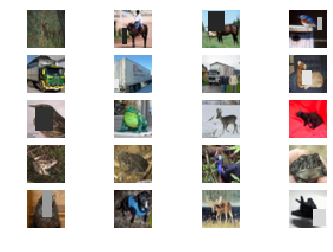

In [27]:
x=train_features[10:31]

eraser = get_random_eraser(v_h=1,v_l=0)
rows,cols=5,4
for i in range(20):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(eraser(x[i]), interpolation="nearest")
    plt.axis('off')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=10)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/10
390/390 [==============================] - 23s 59ms/step - loss: 0.3095 - acc: 0.8999 - val_loss: 0.6587 - val_acc: 0.8146

Epoch 00001: val_acc improved from -inf to 0.81460, saving model to PretrainedResnet18weights.hdf5
Epoch 2/10
390/390 [==============================] - 19s 50ms/step - loss: 0.2272 - acc: 0.9223 - val_loss: 0.6898 - val_acc: 0.8160

Epoch 00002: val_acc improved from 0.81460 to 0.81600, saving model to PretrainedResnet18weights.hdf5
Epoch 3/10
390/390 [==============================] - 19s 49ms/step - loss: 0.2284 - acc: 0.9214 - val_loss: 0.6591 - val_acc: 0.8204

Epoch 00003: val_acc improved from 0.81600 to 0.82040, saving model to PretrainedResnet18weights.hdf5
Epoch 4/10
390/390 [==============================] - 19s 49ms/step - loss: 0.2122 - acc: 0.9269 - val_loss: 0.7954 - val_acc: 0.7987

Epoch 00004: val_acc did not improve from 0.82040
Epoch 5/10
390/390 [==============================] - 19s 49ms/step - loss: 0.1938 - acc: 0.9346 - val_loss

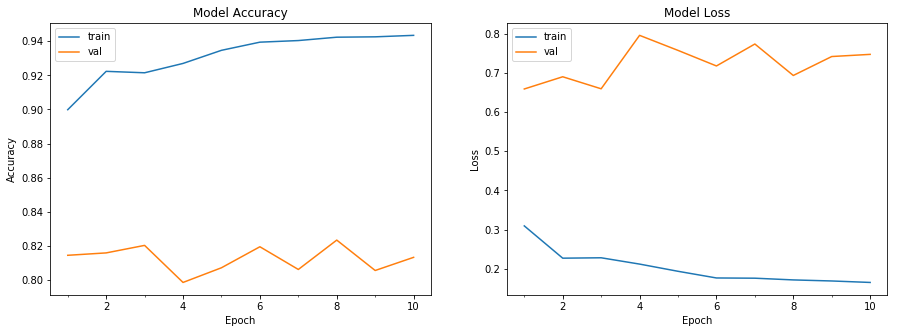

NameError: ignored

In [32]:
from keras.callbacks import ModelCheckpoint
filepath="PretrainedResnet18weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# train the model
start = time.time()
# Train the model
model_info = resnet18_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
import matplotlib

In [0]:
normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)

In [0]:
def visualize_GradCam(img,model,layer_name):


  x = img
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer_name)
  print(class_names[class_idx])
#   plt.imshow(img)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(conv_layer_output_value.shape[-1]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)    


  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  
  ##Changing the range of values to [1,255] so that they can be taken in by applyColorMap function
  
  heatmap = np.uint8(255*heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  ##Chnaging the range again between [0,1]
  
  heatmap=heatmap.astype('float32')/255

  superimposed_img = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)
  
  return superimposed_img

ship


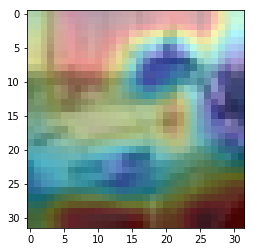

In [36]:
plt.imshow(visualize_GradCam(test_features[2],resnet18_model,'stage1_unit1_relu1'))


In [0]:
predicted=[np.argmax(i) for i in resnet18_model.predict(test_features)]

In [0]:
actual=[np.argmax(i) for i in test_labels]


In [0]:
idxs=[]

for i in range(len(actual)):
  if actual[i]!=predicted[i]:
    
    idxs.append(i)

In [42]:
len(idxs)   #No of Misclassified ones

1866

GradCam Image gallery for misclassified ones

truck
cat
automobile


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


ship
truck
airplane


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


truck
cat
bird
automobile
dog
cat
truck
truck
horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


cat
ship
horse
dog
frog
ship
dog
frog
frog
cat
horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


ship


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


cat


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


bird
cat
ship
ship
cat
ship
cat
ship
horse
cat
deer
truck
cat
bird


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


truck
automobile
ship
ship
deer
bird
ship
ship


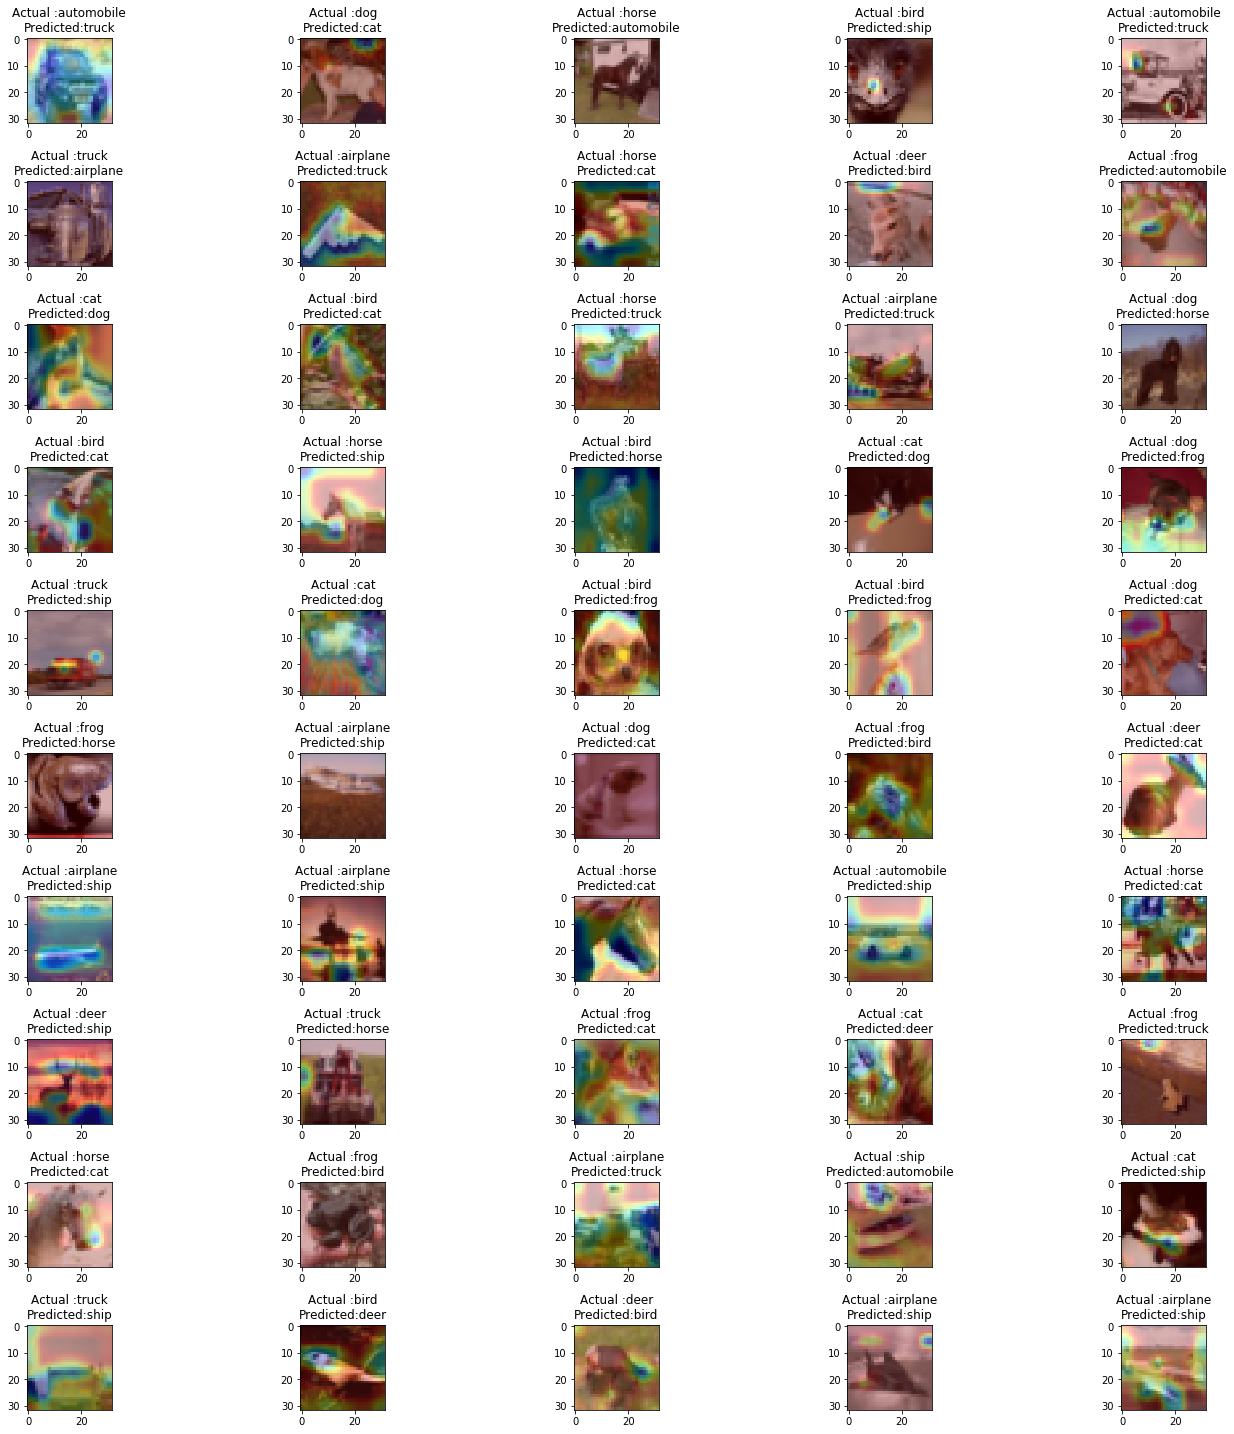

In [43]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 10
for i in range(1, columns*rows+1 ):
    img = visualize_GradCam(test_features[idxs[i]],resnet18_model,layer_name='stage1_unit1_relu1')
    Str="Actual :"+str(class_names[actual[idxs[i]]])+"\nPredicted:"+str(class_names[predicted[idxs[i]]])
    fig.add_subplot(rows, columns, i,).set_title(Str)
    plt.imshow(img)

plt.tight_layout(True)
plt.show()